In [1]:
#libs
import numpy as np

%matplotlib inline               
import matplotlib.pyplot as plt

import scipy.stats as stats
import scipy.signal as signal

#Created: 2021-08-04
#Last Update: 2021-08-04

# Test functions

In [209]:
class function:
    """
        A class for representing easy function objects, such as square pulses, 
        sine, gaussian pulses etc.

        The function class is the AQiPT representation of functions for create waveforms.
        This class also show plots in matplotlib, as well as export the functions to numpy arrays.


        Parameters
        ----------
        tbase : array_like
            Data for vector/matrix representation of the quantum object.
        res : list
            Dimensions of object used for tensor products.
        args : list
            Shape of underlying data structure (matrix shape).

        Attributes
        ----------
        function : array_like
            Sparse matrix characterizing the quantum object.
        function_plot : list
            List of dimensions keeping track of the tensor structure.

        Methods
        -------
        step()
            Conjugate of quantum object.
    """
    def __init__(self, times, args):
        
        #atributes
        self.tbase = times
        self._res = type
        self.args = args
        
    def step(self, plotON=False):
        '''
            Basic step function

            INPUTS
                t (array): time domain of function
                args (dict): width of step function (i.e., start time, step width)
                plotON (bool): shows (True) or not (False) plot

            OUTPUTS
                function: function ready for aqipt.waveform()
                fig: plot of function

            \Example:

                times = np.linspace(0, 1, 100)

                to = 0.2;
                fwidth = 0.1;
                args = {'t_o':to, 'width': fwidth};

                plt.plot(times, step(times, args))
            '''

        function = self.args['amp'] * (abs(self.tbase-self.args['t_o']) < self.args['width']);
        function[0]=self.args['amp'];
        function[len(function)-1]=self.args['amp'];


        if plotON==True:

            fig = plt.figure();
            function_plot = plt.plot(self.tbase, function, figure=fig);
            plt.show(function_plot)

            return function, function_plot

        else:

            return function, plt.plot(self.tbase, function)
    
    def ramp(self, plotON=False):
        '''
            Basic ramp function

            INPUTS
                t (array): time domain of function
                args (dict): width of step function (i.e., start time, step width)
                plotON (bool): shows (True) or not (False) plot

            OUTPUTS
                function: function ready for aqipt.waveform()
                fig: plot of function

            \Example:

                    times = np.linspace(0, 1, 100)

                    to = 0.2;
                    fwidth = 0.1;
                    args = {'t_o':to, 'width': fwidth};

                    plt.plot(times, step(times, args))

        '''

        function = self.args['m'] * self.tbase + self.args['b'];



        if plotON==True:

            fig = plt.figure();
            function_plot = plt.plot(self.tbase, function, figure=fig);
            plt.show(function_plot)

            return function, function_plot
    
        else:

            return function, plt.plot(self.tbase, function)

    def parabola(self, plotON=False):
        '''
            Basic Parabola function

            INPUTS
                t (array): time domain of function
                args (dict): width of step function (i.e., polynomia coefficients, shift)
                plotON (bool): shows (True) or not (False) plot

            OUTPUTS
                function: function ready for aqipt.waveform()
                fig: plot of function

            \Example:

                times = np.linspace(-75, 75, 500); #time domain function

                args = {'a':1, 'b': 0, 'c':0, 'shift':0}; #arguments for function

                f, fplot = parabola(times, args);
                plt.show(fplot)

        '''

        function = self.args['a']*(self.tbase-self.args['shift'])**2 + self.args['b']*self.tbase + self.args['c'];



        if plotON==True:

            fig = plt.figure();
            function_plot = plt.plot(self.tbase, function, figure=fig);
            plt.show(function_plot)

            return function, function_plot

        else:

            return function, plt.plot(self.tbase, function)
        
    def sinusoidal(self, plotON=False):
        '''
            Basic sinusoidal function

            INPUTS
                t (array): time domain of function
                args (dict): width of step function (i.e., amplitude, frequency, phase)
                plotON (bool): shows (True) or not (False) plot

            OUTPUTS
                function: function ready for aqipt.waveform()
                fig: plot of function

            \Example:

                times = np.linspace(0, 1, 500); #time domain function

                args = {'Amp':1, 'freq':5, 'phase':0}; #arguments for function

                f, fplot = sinusoidal(times, args);
                plt.show(fplot)

        '''

        function = self.args['Amp']*np.sin(2 * np.pi * self.args['freq'] * self.tbase + self.args['phase']);



        if plotON==True:

            fig = plt.figure();
            function_plot = plt.plot(self.tbase, function, figure=fig);
            plt.show(function_plot)

            return function, function_plot

        else:

            return function, plt.plot(self.tbase, function)
        
    def gaussian(self, plotON=False):
        '''
            Basic Gaussian function

            INPUTS
                t (array): time domain of function
                args (dict): width of step function (i.e., amplitude, center, standar deviation)
                plotON (bool): shows (True) or not (False) plot

            OUTPUTS
                function: function ready for aqipt.waveform()
                fig: plot of function

            \Example:

                    times = np.linspace(0, 1, 100)

                    amp = 1.0; #gaussian amplitude
                    center = 0.0; #gaussian center
                    std = 0.1; #standard deviation
                    args = {'g_Amp':amp, 'g_center': center, 'g_std':std}; #arguments for function

                    plt.plot(times, gauss(times, args))

        '''

        function = self.args['g_Amp'] * np.exp( -( (self.tbase - self.args['g_center'])**2 / (4*(self.args['g_std'])**2) ));



        if plotON==True:

            fig = plt.figure();
            function_plot = plt.plot(self.tbase, function, figure=fig);
            plt.show(function_plot)

            return function, function_plot

        else:

            return function, plt.plot(self.tbase, function)
        
    def triangular(self, plotON=False):
        '''
        Basic triangular function

        INPUTS
            t (array): time domain of function
            args (dict): width of step function (i.e., amplitude, center, standar deviation)
            plotON (bool): shows (True) or not (False) plot

        OUTPUTS
            function: function ready for aqipt.waveform()
            fig: plot of function

        \Example:

            times = np.linspace(0, 3, 500); #time domain function

            tri_amp = 0; #gaussian amplitude
            tri_freq = 2; #gaussian center
            tri_phase = 0; #standard deviation
            args = {'tri_amp':tri_amp, 'tri_freq':tri_freq, 'tri_phase':tri_phase}; #arguments for function


            f, fplot = triangular(times, args)

        '''

        function = self.args['tri_amp'] *signal.sawtooth(2 * np.pi * self.args['tri_freq'] * self.tbase + self.args['tri_phase'], 0.5);



        if plotON==True:

            fig = plt.figure();
            function_plot = plt.plot(self.tbase, function, figure=fig);
            plt.show(function_plot)

            return function, function_plot

        else:

            return function, plt.plot(self.tbase, function)
    
    def sawtooth(self, plotON=False):
        '''
        Basic sawtooth function

        INPUTS
            t (array): time domain of function
            args (dict): width of step function (i.e., amplitude, center, standar deviation)
            plotON (bool): shows (True) or not (False) plot

        OUTPUTS
            function: function ready for aqipt.waveform()
            fig: plot of function

        \Example:

            times = np.linspace(0, 3, 500); #time domain function

            tri_amp = 0; #gaussian amplitude
            tri_freq = 2; #gaussian center
            tri_phase = 0; #standard deviation
            args = {'tri_amp':tri_amp, 'tri_freq':tri_freq, 'tri_phase':tri_phase}; #arguments for function


            f, fplot = sawtooth(times, args)

        '''

        function = self.args['tri_amp'] *signal.sawtooth(2 * np.pi * self.args['tri_freq'] * self.tbase + self.args['tri_phase'], 1);



        if plotON==True:

            fig = plt.figure();
            function_plot = plt.plot(self.tbase, function, figure=fig);
            plt.show(function_plot)

            return function, function_plot

        else:

            return function, plt.plot(self.tbase, function)

def digitize(data, bitdepth, bottom, top):  #Finn & Shannon's code
    d = np.clip(data, bottom, top)
    a=top-bottom
    return (np.round(((d/a)-bottom)*(2**bitdepth-1))/(2**bitdepth-1)+bottom)*a

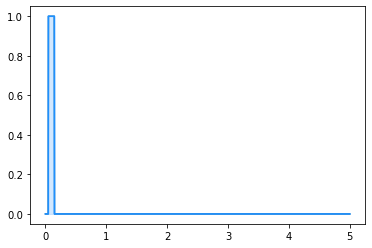

In [18]:
#function 1 - SquareP_L
tbase = np.linspace(0,5,1000)
times = np.linspace(0, 5, 1000); #time domain function

amp = 1.0;
to = 0.1; #start time
fwidth = 0.05; #width of step function
args = {'amp': amp, 't_o':to, 'width': fwidth}; #arguments for function

SquareP_L, plot = function(times, args).step(plotON=False);

plt.step(times, SquareP_L, color='dodgerblue', where='mid')
plt.fill_between(times, SquareP_L, color='dodgerblue', step="mid", alpha=0.2)
# plt.xlim(0,0.2)

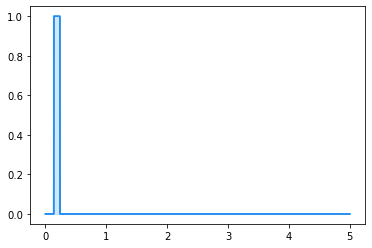

In [28]:
#function 2 - SquareP_R
tbase = np.linspace(0,5,1000)
times = np.linspace(0, 5, 1000); #time domain function

amp = 1.0;
to = 0.19; #start time
fwidth = 0.05; #width of step function
args = {'amp': amp, 't_o':to, 'width': fwidth}; #arguments for function

SquareP_R, plot = function(times, args).step(plotON=False);

plt.step(times, SquareP_R, color='dodgerblue', where='mid')
plt.fill_between(times, SquareP_R, color='dodgerblue', step="mid", alpha=0.2)
# plt.xlim(0,100)

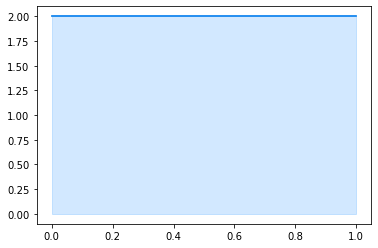

In [211]:
#function 3 - Single_SqP
tbase = np.linspace(0,5,1000)
times = np.linspace(0, 1, 200); #time domain function

amp = 2.0;
to = 0.5; #start time
fwidth = 0.50; #width of step function
args = {'amp': amp, 't_o':to, 'width': fwidth}; #arguments for function

Single_SqP, plot = function(times, args).step(plotON=False);

plt.step(times, Single_SqP, color='dodgerblue', where='mid')
plt.fill_between(times, Single_SqP, color='dodgerblue', step="mid", alpha=0.2)
# plt.xlim(0,0.01)

(0.0, 1.0)

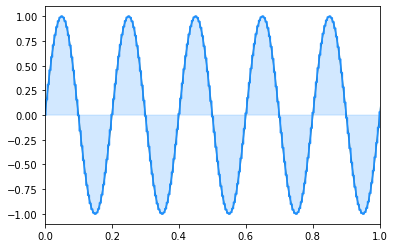

In [251]:
#function 4 - Sine_5osc
times = np.linspace(0, 5, 1000); #time domain function

args = {'Amp':1, 'freq':5, 'phase':0}; #arguments for function

Sine_5osc, plot = function(times, args).sinusoidal()

plt.step(times, Sine_5osc, color='dodgerblue', where='mid')
plt.fill_between(times, Sine_5osc, color='dodgerblue', step="mid", alpha=0.2)
plt.xlim(0,1)

(0.0, 1.0)

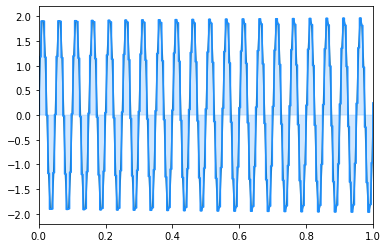

In [7]:
#function 5 - Sine_20osc
times = np.linspace(0, 5, 1000); #time domain function

args = {'Amp':2, 'freq':20, 'phase':0}; #arguments for function

Sine_20osc, plot = function(times, args).sinusoidal()

plt.step(times, Sine_20osc, color='dodgerblue', where='mid')
plt.fill_between(times, Sine_20osc, color='dodgerblue', step="mid", alpha=0.2)
plt.xlim(0,1)

(0.0, 1.0)

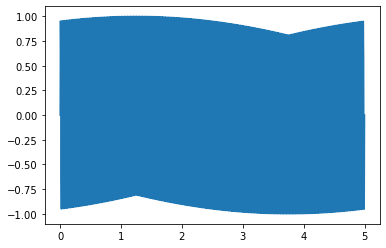

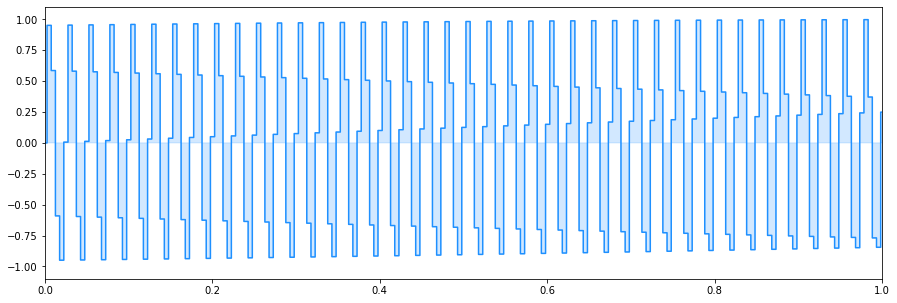

In [8]:
#function 6 - Sine_40osc
times = np.linspace(0, 5, 1000); #time domain function

args = {'Amp':1, 'freq':40, 'phase':0}; #arguments for function

Sine_40osc, plot = function(times, args).sinusoidal()

plt.figure(figsize=(15,5))
plt.step(times, Sine_40osc, color='dodgerblue', where='mid')
plt.fill_between(times, Sine_40osc, color='dodgerblue', step="mid", alpha=0.2)
plt.xlim(0,1)

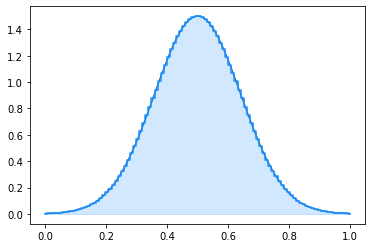

In [229]:
#function 7 - Gauss

times = np.linspace(0, 1, 100); #time domain function

amp = 1.5; #gaussian amplitude
center = 0.5; #gaussian center
std = 0.1; #standard deviation
args = {'g_Amp':amp, 'g_center': center, 'g_std':std}; #arguments for functionction

Gauss, plot = function(times, args).gaussian();

plt.step(times, Gauss, color='dodgerblue', where='mid')
plt.fill_between(times, Gauss, color='dodgerblue', step="mid", alpha=0.2)


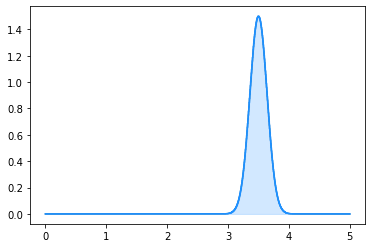

In [231]:
#function 8 - GaussShifted

times = np.linspace(0, 5, 1000); #time domain function

amp = 1.5; #gaussian amplitude
center = 3.5; #gaussian center
std = 0.1; #standard deviation
args = {'g_Amp':amp, 'g_center': center, 'g_std':std}; #arguments for functionction

GaussS, plot = function(times, args).gaussian();

plt.step(times, GaussS, color='dodgerblue', where='mid')
plt.fill_between(times, GaussS, color='dodgerblue', step="mid", alpha=0.2)


# Class ```pulse()```

In [259]:
class pulse:
    """
        A class for building pulses shapes in time domain starting from AQiPT functions() for later
        build the AQiPT tracks() that can be assigned to AQiPT producers() via AQiPT instructions().

        The pulse class is the AQiPT representation of shaped pulse for create tracks.
        This class also show plots in matplotlib, as well as export the pulses as numpy arrays.


        Parameters
        ----------
        tbase : array_like
            Data for vector/matrix representation of the quantum object.
        res : list
            Dimensions of object used for tensor products.
        args : list
            Shape of underlying data structure (matrix shape).

        Attributes
        ----------
        function : array_like
            Sparse matrix characterizing the quantum object.
        function_plot : list
            List of dimensions keeping track of the tensor structure.

        Methods
        -------
        step()
            Conjugate of quantum object.
    """
    def __init__(self, times):
        
        #atributes
        self.tbase = times
        self._res = type
#         self.args = args
        self.waveform = np.zeros(tbase.shape)
    
    def overwriteFunction(self, tstart, function):
        '''
            Basic step function

            INPUTS
                t (array): time domain of function
                args (dict): width of step function (i.e., start time, step width)
                plotON (bool): shows (True) or not (False) plot

            OUTPUTS
                function: function ready for aqipt.waveform()
                fig: plot of function

            \Example:

                times = np.linspace(0, 1, 100)

                to = 0.2;
                fwidth = 0.1;
                args = {'t_o':to, 'width': fwidth};

                plt.plot(times, step(times, args))
        '''
        result = list(self.waveform);
        func = list(function)
#         result[:function.shape[0]] = function
        replace=lambda result,func,s:result[:s]+ func + result[s+len(func):]; #replace function the waveform of function in the tbase at i-point
        
        self.waveform = np.array(replace(result, func, int(tstart))); #replacing waveform of function
        self.waveform[tstart]= (self.waveform[tstart-1]+self.waveform[tstart+1])/2; #fixing point in 0 to the average of the i-1 th and i+1 th point

        return self.waveform
    
    
    
    def addfunction(self, tstart_index, function, kind=None):
        
        wf = self.waveform;
        if kind == 'Carrier':
        
            for i in range(len(function)):
                wf[i+tstart_index] = function[i];

        else:
            for i in range(len(function)):
                if function[i]>wf[i+tstart_index]:
                    wf[i+tstart_index] = function[i];
                       
        self.waveform = wf;
        return self.waveform
    
    def mergeFunction(self, tstart, function):

        self.waveform+=function
        return self.waveform
    
    def getPulse(self):
        return self.waveform

# Examples

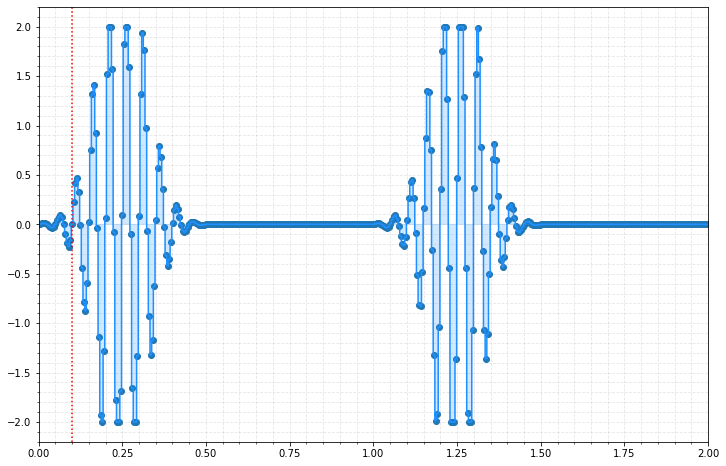

In [283]:

wf_pulse1 = pulse(tbase)

wf_pulse1.addfunction(0, Gauss)
wf_pulse1.addfunction(200, Gauss)
# wf_pulse1.mergeFunction(0, GaussS)

wf_carrier = pulse(tbase)
wf_carrier.addfunction(0, Sine_20osc, 'Carrier')

dig_func = digitize(wf_pulse1.getPulse()*wf_carrier.getPulse(), 16, -2, 2)
# dig_func = digitize(wf_carrier.getPulse(), 16, -2, 2)

plt.figure(figsize=(12,8))
plt.scatter(tbase, dig_func)
plt.step(tbase, dig_func, color='dodgerblue', where='mid')
plt.fill_between(tbase, dig_func, color='dodgerblue', step="mid", alpha=0.2)
plt.axvline(x=tbase[20], linestyle=':', color='red');

plt.grid(b=True, which='both', color='gray', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlim(0.0, 2);


In [383]:
def time2index(time, tbase):
    sampling_rate = len(tbase)
    t_i = tbase[0]; t_f = tbase[len(tbase)-1];
    
    if t_i<t_f:
        try:
            return int(time*sampling_rate/(t_f- t_i))
        except:
            pass
    elif t_f<t_i:
        try:
            return int(time*sampling_rate/abs(t_i-t_f))
        except:
            pass

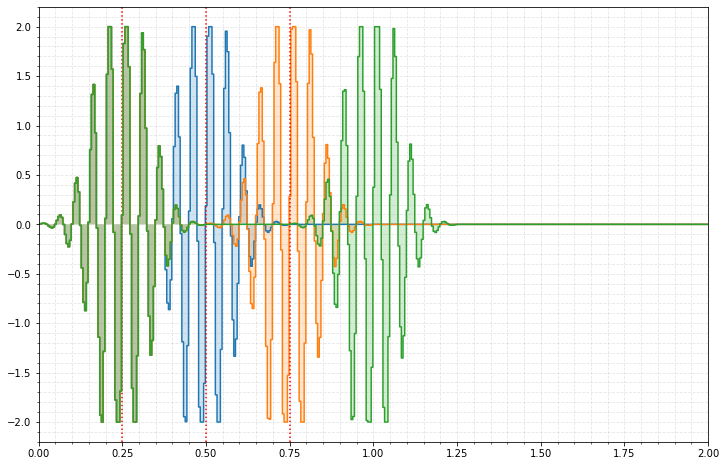

In [369]:
plt.figure(figsize=(12,8))
for i in range(50, 200, 50):
    wf_pulse1 = pulse(tbase)

    wf_pulse1.addfunction(0, Gauss)
    wf_pulse1.addfunction(i, Gauss)
    # wf_pulse1.mergeFunction(0, GaussS)

    wf_carrier = pulse(tbase)
    wf_carrier.addfunction(0, Sine_20osc, 'Carrier')

    dig_func = digitize(wf_pulse1.getPulse()*wf_carrier.getPulse(), 16, -2, 2)
    # dig_func = digitize(wf_carrier.getPulse(), 16, -2, 2)

#     plt.scatter(tbase, dig_func)
    plt.step(tbase, dig_func, where='mid')
    plt.fill_between(tbase, dig_func, step="mid", alpha=0.2)
    plt.axvline(x=tbase[i], linestyle=':', color='red');

plt.grid(b=True, which='both', color='gray', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlim(0.0, 2);


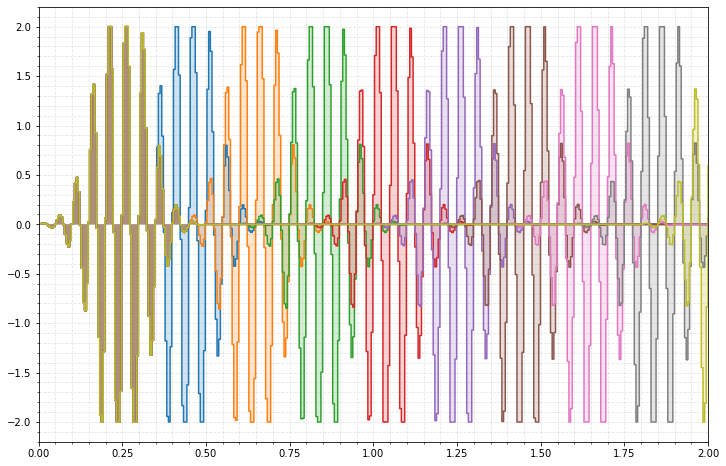

In [384]:
plt.figure(figsize=(12,8))
t_lst = np.arange(0.2, 2, 0.2);
for i in t_lst:
    wf_pulse1 = pulse(tbase);

    wf_pulse1.addfunction(0, Gauss);
    wf_pulse1.addfunction(time2index(i, tbase), Gauss);
    # wf_pulse1.mergeFunction(0, GaussS)

    wf_carrier = pulse(tbase);
    wf_carrier.addfunction(0, Sine_20osc, 'Carrier');

    dig_func = digitize(wf_pulse1.getPulse()*wf_carrier.getPulse(), 16, -2, 2);
    # dig_func = digitize(wf_carrier.getPulse(), 16, -2, 2)

#     plt.scatter(tbase, dig_func)
    plt.step(tbase, dig_func, where='mid');
    plt.fill_between(tbase, dig_func, step="mid", alpha=0.2);
    plt.axvline(x=time2index(i, tbase), linestyle=':', color='red');

plt.grid(b=True, which='both', color='gray', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlim(0.0, 2);


In [ ]:
#libs summary
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())